# Vector

A vector is an **ordered** array of numbers. It is commonly denoted by lowercase english alphabets such as $a$, by placing an arrow over it $\vec{a}$ or by using a boldface letter **a**. To save us time, we will use lowercase letter for representing vector.

Eg., $a$ =$\left[ \begin{array}{c} 1 \\ 3 \\ 2 \end{array} \right]$ or $\left( \begin{array}{c} 1 \\ 3 \\ 2 \end{array} \right)$ or $(1, 3, 2)$

I will be following 0-indexing to have coherence between math and code notation. Hence, $a_{i-1}$ denotes the $i^{th}$ element/component/entry/co-efficient of vector $a$. $\qquad a[0] = 1, a[1] = 3, a[2] = 2$

The total number of *elements* in an array is called its *dimension, length, or size*. A vector of size n is called *n-vector*.

Eg.,

- A 2-vector can represent a point in 2D-space or a displacement in 2D-plane.
- A 3-vector can represent a color with encoded RGB values.
- A 7-vector can represent the hours you studied last week.
- An n-vector can represent an audio signal (change in air pressure)
- and so on...

The numbers that a vector holds are referred to as *scalars*. They can be real/complex/integer etc. We write $a \in \mathbb{R}^n$ to represent that $a$ is a n-vector with all the elements being real numbers. In our case, we will mostly deal with real vectors i.e. vectors with entries being real numbers.

**Equality of vectors**: $a = b \implies a_i =  b_i$ for all $i$.

# Geometrical interpretation of vector

Think of a n-vector as a route/path/displacement in an n-dimensional space.

Eg., A 2-vector $(2, 4)$ tells us to move $2$ units in x-direction and $4$ units in y-direction.

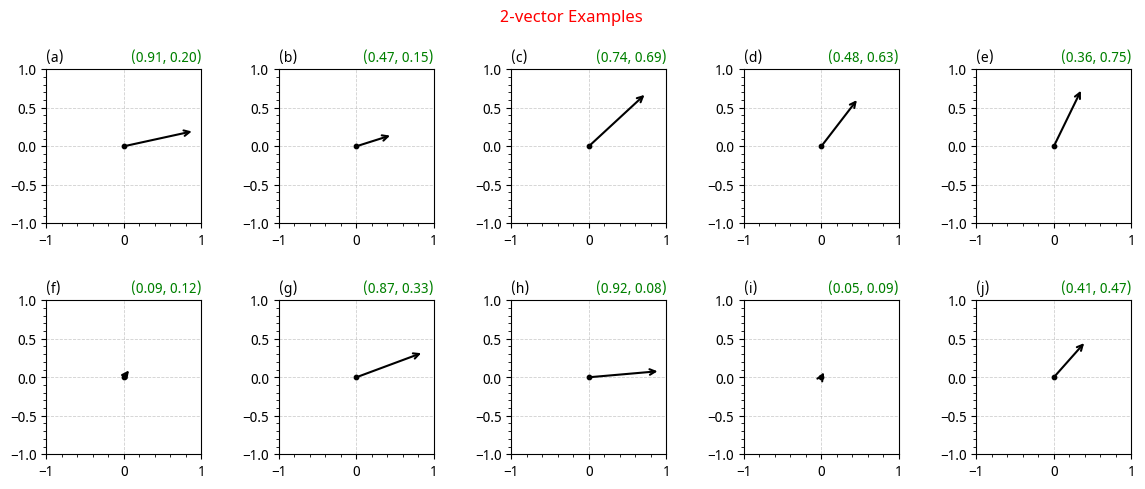

In [2]:
import numpy as np
import modusa as ms

vs = np.random.random(20).reshape(-1, 2) # List of 10 2-vectors

#==== Visualization
# Layouts
fig, axs = ms.figlayouts.collage(
    config=(2, 5), 
    size=2, 
    xlims=[(-1, 1)]*10, 
    ylims=[(-1, 1)]*10
)


# Paint
for i, ax in enumerate(np.ravel(axs)):
    v = vs[i]
    ms.paint.arrow(ax, start=(0, 0), end=v, head_size=0.02)
    ms.set.title(ax, title=f"({v[0]:.2f}, {v[1]:.2f})")

ms.set.figtitle(fig, "2-vector Examples")

The idea of thinking a vector as a route can be generalised to even vectors of higher dimensions.

In [3]:
# Using numpy for vector
a = np.array([1, 3, 2]) # Creating vector a

print(f"vector = {a}")
print(f"size/dimension = {a.size}") # Get size of vector a
print(f"3rd element = {a[2]}") # Get third element of vector a (indexing starts from 0)

b = np.array([1, 3, 2])
print(f"Is a = b? {np.allclose(a, b)}") # Check if a = b

vector = [1 3 2]
size/dimension = 3
3rd element = 2
Is a = b? True


# Special Vectors

There are some vectors that are used so often that we had given them special names.

**Zero vector**: \
A vector with all the elements equal to zero. We represent a zero n-vector as $0_n$ or simply $0$.

**Ones vector**: \
A vector with all the elements equal to one. We represent a ones n-vector as $1_n$ or simply $1$.

**Unit vector**: \
A vector with all the elements equal to zero except one element which is equal to one. It is denoted by $e_i$ where at index $i$, the value is 1.

$
(e_{i})_{j} =
\begin{cases}
1, & \text{if } j = i \\
0, & \text{otherwise.}
\end{cases}
$

**Sparse vector**: \
A vector is said to be sparse most of the entries are zero. Its *Sparsity pattern* is the set of all indices with entries zero. The total number of non-zero entries in a vector is denoted by nnz(a).

In [3]:
#==== Zero vector
a = np.zeros(6) # zero 6-vector
print(f"zero 6-vector = {a}")
print(f"----------")

#==== Ones vector
a = np.ones(5) # ones 5-vector
print(f"ones 5-vector = {a}")
print(f"----------")

#==== Unit vector
e_3 = np.zeros(5)
e_3[2] = 1 # Flip the 0 at 3rd index to 1
print(f"e_3 = {e_3}")
print(f"----------")

#==== Sparse vector
a = np.array([0, 0, 0, 1, 0, 0, 2])
nnz = lambda x: x[x != 0].size # A utility function to find number of non-zero entries
print(f"a = {a}")
print(f"nnz(a) = {nnz(a)}")

zero 6-vector = [0. 0. 0. 0. 0. 0.]
----------
ones 5-vector = [1. 1. 1. 1. 1.]
----------
e_3 = [0. 0. 1. 0. 0.]
----------
a = [0 0 0 1 0 0 2]
nnz(a) = 2


# Vector Addition and Subtraction

The sum of two n-vectors $a, b$ of same size $n$ is given by:

$a + b = (a_1 + b_1, a_2 + b_2, ..., a_n + b_n)$

The difference of two n-vectors $a, b$ of same size $n$ is given by:

$a - b = (a_1 - b_1, a_2 - b_2, ..., a_n - b_n)$

---

Properties of vector addition are:
- $a+b = b+a$
- $(a+b)+c = a+(b+c)$
- $a+0 = 0+a = a$
- $a - a = 0$

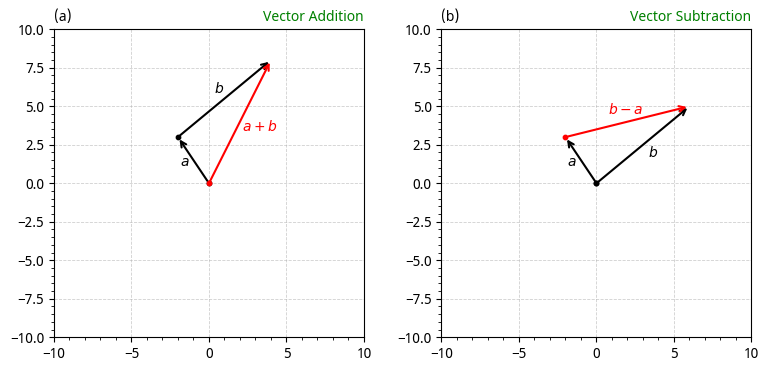

In [4]:
a = np.array([-2, 3])
b = np.array([6, 5])

s = a + b # Sum
d = b - a # Difference

# == Visualization
fig, axs = ms.figlayouts.collage(
    config=(1, 2), 
    size=4,
    xlims=[(-10, 10)]*2,
    ylims=[(-10, 10)]*2,
    titles=["Vector Addition", "Vector Subtraction"],
)

# Paint
ms.paint.arrow(axs[0, 0], (0, 0), a, head_size=0.02, arrow_label="$a$", offset=0.7)
ms.paint.arrow(axs[0, 0], a, a+b, head_size=0.02, arrow_label="$b$", offset=0.5)

ms.paint.arrow(axs[0, 0], (0,0), a+b, head_size=0.02, c="r", arrow_label="$a+b$", offset=-1.4)

ms.paint.arrow(axs[0,1], np.zeros(2), a, head_size=0.02, arrow_label="$a$", offset=0.7)
ms.paint.arrow(axs[0,1], np.zeros(2), b, head_size=0.02, arrow_label="$b$", offset=-1)
ms.paint.arrow(axs[0,1], a, b, c="r", head_size=0.02, arrow_label="$b-a$", offset=0.5)

**Vector Addition**
- Vector addition is like chaining routes or decomposing a route into subroutes.
- If you want to reach $c=a+b$, take subroute $a$ then $b$.

**Vector Subtraction**
- Vector subtraction is like finding routes.
- You already took route $a$ and now want to reach $b$, you have two options:
    - Take the route $-a$ which is like going back to the starting point and then take the route $b$.
    - A better approach would be to take the route given by $b-a$.

# Vector scaling

Given a n-vector $a$, we can perform scaling or scalar multiplication by multipying each of its elements with a number (scalar).

$\lambda a = (\lambda a_1, \lambda a_2, ..., \lambda a_n) \qquad$ $\lambda$ can be called scaling factor.

Eg., $z = 2 \begin{bmatrix} 2 \\ 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 4 \\ 4 \\ 2 \end{bmatrix}$

---
Some of the properties are:
- $\alpha a = a \alpha$
- $(\alpha \beta)a = \alpha (\beta a)$
- $\alpha \beta a = \alpha a \beta = a \alpha \beta$
- $(\alpha + \beta) a = \alpha a + \beta a \quad$ LHS $+$ is scalar addition and RHS $+$ is vector addition 
- $a (\alpha + \beta) = a \alpha + a \beta \quad$ LHS $+$ is scalar addition and RHS $+$ is vector addition 
- $\alpha (a + b) = \alpha a + \alpha b \quad$ LHS $+$ is vector addition and RHS $+$ is vector addition

---

Different contexts have different interpretation of the scaling operation. For eg.,

- If $a$ is displacement vector then $\lambda a$ is another with double the displacement in the same direction.
- If $a$ is an audio signal then $\lambda a$ controls the loudness of the audio.


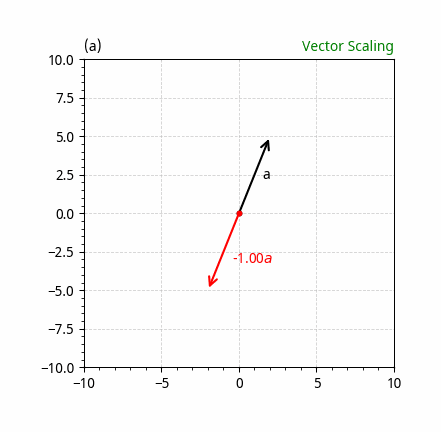

In [5]:
v = np.array([2, 5])
lams = np.arange(-1.0, 2.1, 0.25)

# == Visualization
with ms.animate("./tmp/scaling.gif", loop=True, fps=3) as anim:
    for lam in lams:
        scaled_v = v * lam
        
        fig, axs = ms.figlayouts.collage(
            config=(1, 1), 
            size=4,
            xlims=[(-10, 10)],
            ylims=[(-10, 10)],
            titles=["Vector Scaling"],
            
        )
    
        ms.paint.arrow(axs[0, 0], (0, 0), v, arrow_label="a", offset=-0.8, head_size=0.03)
        ms.paint.arrow(axs[0, 0], (0, 0), scaled_v, arrow_label=f"{lam:.2f}$a$", offset=2.0, head_size=0.03, c="r")

        anim.snapshot(fig)

# Linear combination of vectors

If $a_0, ..., a_{m-1}$ are n-vectors and $\beta_0, ..., \beta_{m-1}$ are scalars then $\sum_{i=0}^{m-1}\beta_i a_i$ is called the linear combination of the vectors $a_0, ..., a_{m-1}$. The scalars $\beta_0, ..., \beta_{m-1}$ are called the weights/co-efficients of the linear combination.

Based on different constraints on $\beta_i$, the linear combination can have different high-level meaning that we are already familiar with. For eg.,

$x = \sum_{i=0}^{m-1}\beta_i a_i$ becomes the **sum** of the vectors if $\beta_0, ..., \beta_{m-1} = 1$

$x = \sum_{i=0}^{m-1}\beta_i a_i$ becomes the **average** of the vectors if $\beta_0, ..., \beta_{m-1} = \frac{1}{m}$

$x = \sum_{i=0}^{m-1}\beta_i a_i$ is known as **affine combination** of the vectors if $\beta_0 + ... + \beta_{m-1} = 1$

$x = \sum_{i=0}^{m-1}\beta_i a_i$ is known as **convex combination** of the vectors if $\beta_0 + ... + \beta_{m-1} = 1$ and $\beta_i \in \mathbb{R}_+$


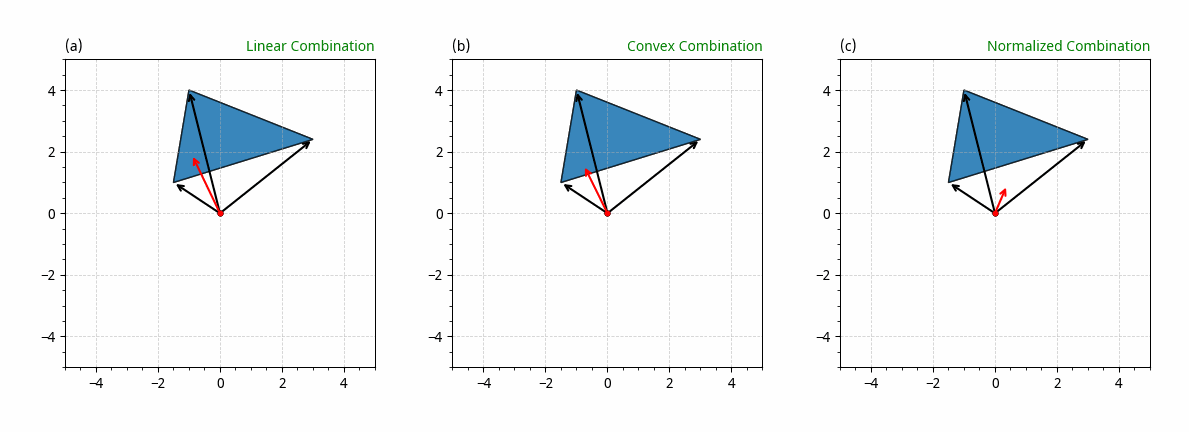

In [6]:
def compute_linear_combination(vs, ws):
    """

    Parameters
    ----------
        vs: ndarray (number of vectors, vector dimension)
            Vectors
        ws: ndarray (number of vector)
            Weights of linear combination
    Returns
    -------
    float:
        Linear combination of the vectors.
    """
    
    lc = vs.T @ ws # (dim, n) X (n, 1) => (d, 1)
    
    return lc
    

# Create a set of vectors for linear combination
n, dim = 3, 2

vs = np.array([[-1, 4], [3, 2.4], [-1.5, 1]]) # 3 vectors, 2 dim

# === Visualization
with ms.animate("./tmp/lc.gif", fps=4) as anim:

    for frame in range(20):
        # Random weights
        ws = np.random.random(3)
        lc_r = compute_linear_combination(vs, ws)
    
        # Convex combination
        ws = np.random.random(3)
        ws = ws / np.sum(ws)
        lc_c = compute_linear_combination(vs, ws)
    
        # Normalized combination
        ws = np.random.random(3)
        lc_n = compute_linear_combination(vs, ws)
        lc_n = lc_n / np.linalg.norm(lc_n)

        # Visualization
        fig, axs = ms.figlayouts.collage(
            config=(1, 3), 
            size=4,
            xlims=[(-5, 5)] * 3,
            ylims=[(-5, 5)] * 3,
            titles=["Linear Combination", "Convex Combination",  "Normalized Combination"]
        )

        # Paint
        for v in vs:
            for ax in np.ravel(axs):
                ms.paint.arrow(ax, (0, 0), v, head_size=0.02)
                ms.paint.polygon(ax, vs)
        
        ms.paint.arrow(axs[0,0], (0, 0), lc_r, c="r", head_size=0.02)
        ms.paint.arrow(axs[0,1], (0, 0), lc_c, c="r", head_size=0.02)
        ms.paint.arrow(axs[0,2], (0, 0), lc_n, c="r", head_size=0.02)
        
        anim.snapshot(fig)

The red arrow above shows a possible linear combination of the three vectors (shown as black arrow).

- In (a), we have no contraints on the coefficients $\lambda$, the final vector can encode route to any location in the space.
- In (b), we have $\sum \lambda = 1$ contrains, the final vector is trapped in subregion formed by joining all the vectors endpoint in the space.
- In (c), we normalize final vector thus the magnitude of the final vector does not change, hence it only changes direction.

# Inner product

The inner product aka dot product of two n-vectors is given by:

$a^Tb = a_0b_0 + a_1b_1 + ... + a_{n-1}b_{n-1}$

The product gives a metric of how similar directions they both are pointing to.

When we take inner product of two vectors, there is a meaning associated with it that needs to be understood. For ex., If $a=(a_0, a_1, ..., a_{n-1}), b=(b_0, b_1, ..., b_{n-1})$
are two n-vectors representing the price of n differnt items in your cart and the quantity of each item you purchased respectively, then the inner product $a^Tb$ is the total amount you need to pay.


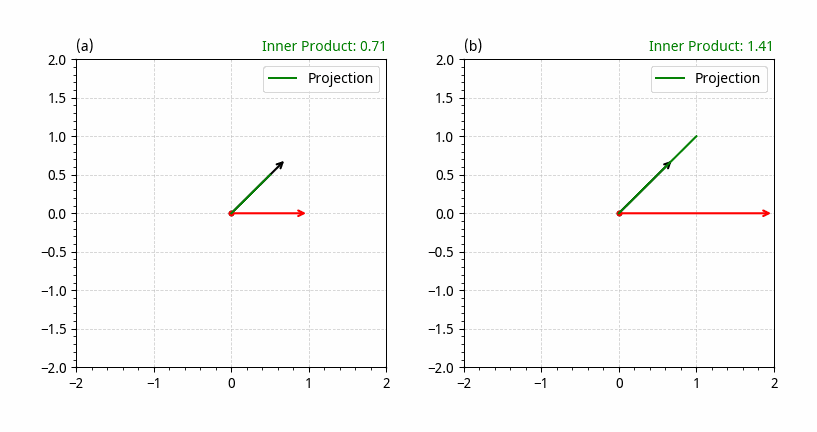

In [9]:
v = np.array([1, 1]).astype(float)
v /= np.linalg.norm(v)

with ms.animate("./tmp/ip.gif", fps=4) as anim:
    
    for frame in range(20):  # 60 frames for full rotation
        theta = - 2 * np.pi * frame / 20  # angle in radians
        probe1 = np.array([np.cos(theta), np.sin(theta)])  # unit circle vector
        probe2 = 2 * probe1
        
        c1 = v @ probe1  # inner product (dot product)
        c2 = v @ probe2  # inner product (dot product)
        

        # Visualization
        fig, axs = ms.figlayouts.collage(
            config=(1, 2), 
            size=4,
            xlims=[(-2, 2)]*2,
            ylims=[(-2, 2)]*2,
            titles=[f"Inner Product: {c1:.2f}", f"Inner Product: {c2:.2f}"]
        )

        # Paint
        ms.paint.arrow(axs[0,0], (0, 0), v, head_size=0.02)
        ms.paint.arrow(axs[0,0], (0, 0), probe1, head_size=0.02, c="r")
        ms.paint.line(axs[0,0], (0, 0), c1 * v, c="g", label="Projection") # Paint the projection
        

        ms.paint.arrow(axs[0,1], (0, 0), v, head_size=0.02)
        ms.paint.arrow(axs[0,1], (0, 0), probe2, head_size=0.02, c="r")
        ms.paint.line(axs[0,1], (0, 0), c2 * v, c="g", label="Projection")

        for ax in np.ravel(axs):
            ms.set.legend(ax)
        
        anim.snapshot(fig)

In figures (a) and (b), we observe that the inner product increases when the vectors point in the same direction. In figure (b), increasing the probe’s length makes the inner product larger in magnitude. This is why we often normalize vectors before computing their inner product.